# Práctica Machine Learning

### Alumno: Alejandro López Sánchez

### V Bootcamp Big Data y ML Keepcoding

<span style="color:ROYALBLUE"></span>

<span style="color:ROYALBLUE">Importamos las funciones y librerías necesarias</span>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

<span style="color:ROYALBLUE">Vamos a cargar el dataset, utilizo el mismo que nos entrega el profesor para evitar problemas.</span>

<span style="color:ROYALBLUE">Dividimos el dataset en train y test lo primero para evitar malas prácticas.</span>

In [2]:
df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


<span style="color:ROYALBLUE">De aquí en adelante usaremos el dataframe de train.</span>

In [3]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

<span style="color:ROYALBLUE">Realizamos un primer análisis exploratorio, para ver que columnas no vamos a necesitar.</span>

In [4]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [5]:
df.shape

(11824, 89)

<span style="color:ROYALBLUE">El dataset contiene 11.824 filas y 89 columnas (variables).</span>

<span style="color:ROYALBLUE">Vamos a listar todas las columnas para ir analizándolas.</span>

In [6]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

<span style="color:ROYALBLUE">Iremos analizando las columnas en lotes para poder visualizarlas con la función head, o describe.</span>

In [7]:
df.loc[:,['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview']].head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN


In [8]:
df.loc[:,['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview']].dtypes

ID                        int64
Listing Url              object
Scrape ID                 int64
Last Scraped             object
Name                     object
Summary                  object
Space                    object
Description              object
Experiences Offered      object
Neighborhood Overview    object
dtype: object

In [9]:
df["Experiences Offered"].value_counts()

none        11810
business        6
family          3
social          3
romantic        2
Name: Experiences Offered, dtype: int64

<ul style="color:ROYALBLUE">
    <li><b>ID: </b>Es el código que utiliza la base de datos de airbnb para identificar el inmueble. No es relevante para nuestro análisis.</li>
    <li><b>Listing Url: </b>Es la url del anuncio del inmueble. No es relevante para nuestro análisis.</li>
    <li><b>Scrape ID: </b>Es el código de identificación del scraping. No es relevante para nuestro análisis.</li>
    <li><b>Last Scraped: </b>La última vez que fue scrapeado el anuncio. No es relevante para nuestro análisis.</li>
    <li><b>Name: </b>El nombre que le ha puesto el anunciante al apartamento. No es relevante para nuestro análisis.</li>
    <li><b>Summary: </b>Un resumen de como es el apartamento. No es relevante para nuestro análisis.</li>
    <li><b>Space: </b>Descripción del apartamento y alrededores. No es relevante para nuestro análisis.</li>
    <li><b>Description: </b>Descripción del apartamento. No es relevante para nuestro análisis.</li>
    <li><b>Experiences Offered: </b>Esta columna podría haber sido interesante, pero hemos visto que 11.810 anuncios no tienen información de este tipo. No es relevante para nuestro análisis.</li>
    <li><b>Neighborhood Overview: </b>Descripción del barrio. No es relevante para nuestro análisis.</li>
</ul>

In [10]:
df.loc[:,['Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']].head()

,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url
0,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...
1,Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...
2,NaN,羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/05baad20-7...,https://a0.muscache.com/im/pictures/05baad20-7...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/05baad20-7...
3,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/111496270/...,https://a0.muscache.com/im/pictures/111496270/...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/111496270/...
4,NaN,NaN,WE CAN DO TO HOST COLLECTION SERVICE FROM THE ...,NaN,"In the apartment smoking is not allowed, but i...",https://a0.muscache.com/im/pictures/17487722/1...,https://a0.muscache.com/im/pictures/17487722/1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/17487722/1...


In [11]:
df.loc[:,['Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']].dtypes

Notes             object
Transit           object
Access            object
Interaction       object
House Rules       object
Thumbnail Url     object
Medium Url        object
Picture Url       object
XL Picture Url    object
dtype: object

<ul style="color:ROYALBLUE">
    <li><b>Notes: </b>Notas adicionales que pone el anunciante. No es relevante para nuestro análisis.</li>
    <li><b>Transit: </b>Descripción de medios de transporte para llegar al inmueble. No es relevante para nuestro análisis.</li>
    <li><b>Access: </b>Otro tipo de servicios. No es relevante para nuestro análisis.</li>
    <li><b>Interaction: </b>Interacción con los anunciantes. No es relevante para nuestro análisis.</li>
    <li><b>House Rules: </b>Normas a cumplir. No es relevante para nuestro análisis.</li>
    <li><b>Thumbnail Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
    <li><b>Medium Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
    <li><b>Picture Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
    <li><b>XL Picture Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
</ul>

In [12]:
df.loc[:,['Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate']].head()

,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate
0,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0
1,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0
2,84213235,https://www.airbnb.com/users/show/84213235,玲,2016-07-17,"Madrid, Community of Madrid, Spain","Our hotel near the city center, next to the su...",within an hour,100.0
3,15258781,https://www.airbnb.com/users/show/15258781,Erasmo´S,2014-05-08,"Madrid, Community of Madrid, Spain",Disfruta de tu habitación en el centro de Madr...,within a few hours,100.0
4,1706029,https://www.airbnb.com/users/show/1706029,David Y Ana,2012-02-06,"Madrid, Community of Madrid, Spain","Somos una pareja de Español y Colombiana, amab...",within an hour,100.0


In [13]:
df.loc[:,['Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate', ]].dtypes

Host ID                 int64
Host URL               object
Host Name              object
Host Since             object
Host Location          object
Host About             object
Host Response Time     object
Host Response Rate    float64
dtype: object

In [14]:
df["Host Response Time"].isna().sum()

1507

In [15]:
df["Host Response Time"].unique()

array(['within a few hours', 'within an hour', 'within a day', nan,
       'a few days or more'], dtype=object)

In [16]:
df["Host Response Time"].value_counts()

within an hour        6337
within a few hours    2291
within a day          1448
a few days or more     241
Name: Host Response Time, dtype: int64

In [17]:
df["Host Response Rate"].value_counts()

100.0    7763
90.0      269
96.0      236
99.0      205
75.0      181
         ... 
41.0        1
54.0        1
27.0        1
9.0         1
42.0        1
Name: Host Response Rate, Length: 67, dtype: int64

<ul style="color:ROYALBLUE">
    <li><b>Host ID: </b>Identificación de los anfitriones. No es relevante para nuestro análisis.</li>
    <li><b>Host URL: </b>Dirección URL. No es relevante para nuestro análisis.</li>
    <li><b>Host Name: </b>Nombre de los anfitriones. No es relevante para nuestro análisis.</li>
    <li><b>Host Since: </b>Fecha de incripción del anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host Location: </b>Lugar donde se aloja el anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host About: </b>Descripción del anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host Response Time: </b>Tiempo de respuesta del anfitrión. Puede ser relevante para nuestro análisis y tendremos que codificarlo, porque tiene 5 valores posibles.</li>
    <li><b>Host Response Rate: </b>Ratio de respuesta del anfitrión. Es un valor decimal y puede ser relevante para el análisis.</li>
</ul>

In [18]:
df.loc[:,['Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street']].head()

,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street
0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ..."
1,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain"
2,NaN,https://a0.muscache.com/im/pictures/a4185ec1-7...,https://a0.muscache.com/im/pictures/a4185ec1-7...,Carabanchel,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...","Carabanchel, Madrid, Comunidad de Madrid 28025..."
3,NaN,https://a0.muscache.com/im/users/15258781/prof...,https://a0.muscache.com/im/users/15258781/prof...,Justicia,114.0,114.0,"email,phone,reviews,work_email","Madrid, Comunidad de Madrid 28012, Spain"
4,NaN,https://a0.muscache.com/im/users/1706029/profi...,https://a0.muscache.com/im/users/1706029/profi...,Gaztambide,2.0,2.0,"email,phone,reviews,jumio","Gaztambide, Madrid, 28 28015, Spain"


In [19]:
df["Host Acceptance Rate"].isna().sum()

11794

In [20]:
df.loc[:,['Host Listings Count',
       'Host Total Listings Count']].describe()

,Host Listings Count,Host Total Listings Count
count,11821.000000,11821.000000
mean,12.754420,12.754420
std,34.578895,34.578895
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,6.000000,6.000000
max,519.000000,519.000000


<ul style="color:ROYALBLUE">
    <li><b>Host Acceptance Rate: </b>Prácticamente todas sus filas (11.794) tienen un valor NaN. No es relevante para nuestro análisis.</li>
    <li><b>Host Thumbnail Url: </b>Dirección URL. No es relevante para nuestro análisis.</li>
    <li><b>Host Picture Url: </b>Dirección URL. No es relevante para nuestro análisis.</li>
    <li><b>Host Neighbourhood: </b>Barrio del anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host Listings Count: </b>Métrica para medir la experiencia del host, tendremos otra más relevante posteriormente. No es relevante para nuestro análisis.</li>
    <li><b>Host Total Listings Count: </b>La misma que la anterior. No es relevante para nuestro análisis.</li>
    <li><b>Host Verifications: </b>Medios de verificación del anfitrión. Puede ser relevante para nuestro análisis ya que cuantos más medios de verificación tenga el 
        anfitrión pueda ser más fiable e influir en el precio. Para ello transformamos la columna al número de verficaciones.</li>
    <li><b>Street: </b>Dirección del inmueble. No es relevante para nuestro análisis.</li>
</ul>

In [21]:
df.loc[:,['Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market']].head()

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market
0,Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid
1,NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid
2,Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid
3,NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid
4,Gaztambide,Gaztambide,Chamberí,Madrid,28,28015,Madrid


In [22]:
df.loc[:,['Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market']].dtypes

Neighbourhood                   object
Neighbourhood Cleansed          object
Neighbourhood Group Cleansed    object
City                            object
State                           object
Zipcode                         object
Market                          object
dtype: object

In [23]:
df.loc[df.loc[:,"City"] == "Madrid"].count()

ID                                10567
Listing Url                       10567
Scrape ID                         10567
Last Scraped                      10567
Name                              10567
                                  ...  
Cancellation Policy               10567
Calculated host listings count    10567
Reviews per Month                  8388
Geolocation                       10567
Features                          10567
Length: 89, dtype: int64

In [24]:
len(df['City'].unique())

223

<ul style="color:ROYALBLUE">
    <li><b>Neighbourhood: </b>El barrio del inmueble. Puede tener mucha influencia en el precio los que tiene el barrio no disponible los rellenamos con la columna
        Neighbourhood Cleansed.</li>
    <li><b>Neighbourhood Cleansed: </b>Lo usamos para rellenar nan de la columna anterior. No es relevante para nuestro análisis.</li>
    <li><b>Neighbourhood Group Cleansed: </b>Otra información adicional al barrio. No es relevante para nuestro análisis.</li>
    <li><b>City: </b>Ciudad del inmueble. Comprobamos que de los 11.824 inmuebles 10.567 pertenecen a Madrid, por tanto el resto de ciudaddes que son 223 serán muy poco
        significativas y filtraremos el dataframe sólo con inmuebles de Madrid.</li>
    <li><b>State: </b>País o estado del inmuble, al sólo tener inmuebles de Madrid no es relevante para nuestro análisis.</li>
    <li><b>Zipcode: </b>Al igual que el barrio puede ser relevante para nuestro análisis.</li>
    <li><b>Market: </b>Contiene la misma información que City. No es relevante para nuestro análisis.</li>
</ul>

In [25]:
df.loc[:,['Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',]].head()

,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price
0,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0
1,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN
2,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",NaN,10.0,NaN
3,"Madrid, Spain",ES,Spain,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",NaN,30.0,NaN
4,"Madrid, Spain",ES,Spain,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,32.0,NaN


In [26]:
df.loc[:,['Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',]].dtypes

Smart Location     object
Country Code       object
Country            object
Latitude          float64
Longitude         float64
Property Type      object
Room Type          object
Accommodates        int64
Bathrooms         float64
Bedrooms          float64
Beds              float64
Bed Type           object
Amenities          object
Square Feet       float64
Price             float64
Weekly Price      float64
dtype: object

In [27]:
df['Property Type'].value_counts()

Apartment             9598
House                 1085
Condominium            284
Bed & Breakfast        274
Loft                   248
Other                  171
Dorm                    37
Guesthouse              32
Chalet                  22
Villa                   15
Townhouse               15
Hostel                  13
Serviced apartment       9
Boutique hotel           5
Boat                     3
Camper/RV                3
Casa particular          3
Guest suite              2
Bungalow                 2
Earth House              2
Tent                     1
Name: Property Type, dtype: int64

In [28]:
df['Room Type'].value_counts()

Entire home/apt    7191
Private room       4471
Shared room         162
Name: Room Type, dtype: int64

<ul style="color:ROYALBLUE">
    <li><b>Smart Location: </b>Misma información que City. No es relevante para nuestro análisis.</li>
    <li><b>Country Code: </b>País o estado del inmuble, al sólo tener inmuebles de Madrid no es relevante para nuestro análisis.</li>
    <li><b>Country: </b>País o estado del inmuble, al sólo tener inmuebles de Madrid no es relevante para nuestro análisis.</li>
    <li><b>Latitude: </b>Latitud del inmueble. Puede ser relevante para identificar zonas de precios.</li>
    <li><b>Longitude: </b>Latitud del inmueble. Puede ser relevante para identificar zonas de precios.</li>
    <li><b>Property Type: </b>Tipo de inmueble, puede ser relevante para predecir el precio, habrá que codificar esta columna.</li>
    <li><b>Room Type: </b>Tipo de alquiler (compartido, o íntegro), puede ser relevante para predecir el precio, habrá que codificar esta columna.</li>
    <li><b>Accommodates: </b>Número de personas que entran en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Bathrooms: </b>Número de baños que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Bedrooms: </b>Número de dormitorios que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Beds: </b>Número de camas que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Bed Type: </b>Tipo de cama que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Amenities: </b>Comodidades que dispone el inmueble. Puede ser relevante para nuestro análisis ya que cuantas más comodidades tenga pueda
        influir en el precio. Para ello transformamos la columna al número de verficaciones.</li>
    <li><b>Square Feet: </b>Número de pies cuadrados que tiene el inmueble, puede ser relevante para predecir el precio.</li>
</ul>

In [29]:
df.loc[:,['Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',]].head()

,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped
0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08
1,NaN,15.0,1,0,1,1125,today,NaN,15,39,64,208,2017-04-08
2,NaN,5.0,1,0,3,30,a week ago,NaN,14,44,74,140,2017-04-08
3,NaN,NaN,1,0,10,1125,3 days ago,NaN,0,6,36,311,2017-04-08
4,NaN,NaN,1,10,1,1125,5 days ago,NaN,7,34,62,337,2017-04-08


In [30]:
df.loc[:,['Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',]].dtypes

Security Deposit         float64
Cleaning Fee             float64
Guests Included            int64
Extra People               int64
Minimum Nights             int64
Maximum Nights             int64
Calendar Updated          object
Has Availability          object
Availability 30            int64
Availability 60            int64
Availability 90            int64
Availability 365           int64
Calendar last Scraped     object
dtype: object

In [31]:
df.loc[:,['Has Availability',]].isnull().sum()

Has Availability    11815
dtype: int64

<ul style="color:ROYALBLUE">
    <li><b>Security Deposit: </b>Fianza que pide el anfitrión, puede ser relevante para nuestro análisis.</li>
    <li><b>Cleaning Fee: </b>Tasa de limpieza, puede ser relevante para nuestro análisis.</li>
    <li><b>Guests Included: </b>Número de invitados adicionales que puedes alojar en el inmueble, puede ser relevante para nuestro análisis.</li>
    <li><b>Extra People: </b>Importe a pagar por cada invitado adicional que puedes alojar en el inmueble, puede ser relevante para nuestro análisis.</li>
    <li><b>Minimum Nights: </b>Noches mínimas a alquilar. Puede ser relevante.</li>
    <li><b>Maximum Nights: </b>Noches máximas a alquilar. Puede ser relevante.</li>
    <li><b>Calendar Updated: </b>Última vez que se actualizó el calendario. No es relevante para nuestro análisis.</li>
    <li><b>Has Availability: </b>Es una columna entera de nulos. No es relevante para nuestro análisis.</li>
    <li><b>Availability 30, 60, 90, 365: </b>Días de disponibilidad en los proxímos 30, 60, 90 y 365 días, puede ser relevante para predecir el precio.</li>
    <li><b>Calendar last Scraped: </b>Última vez que se scrapeó el anuncio. No es relevante para nuestro análisis.</li>
</ul>

In [32]:
df.loc[:,['Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location','Review Scores Value']].head()

,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
0,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0
1,20,2016-08-05,2017-03-20,91.0,9.0,9.0,10.0,10.0,10.0,10.0
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97,2013-06-07,2017-02-28,92.0,9.0,9.0,9.0,10.0,9.0,9.0


In [33]:
df.loc[:,['Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location','Review Scores Value']].dtypes

Number of Reviews                int64
First Review                    object
Last Review                     object
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location         float64
Review Scores Value            float64
dtype: object

<ul style="color:ROYALBLUE">
    <li><b>Number of Reviews: </b>Número de opiniones que tiene el inmueble, puede ser relevante para nuestro análisis.</li>
    <li><b>First Review: </b>Fecha de la primera opinión, no es relevante para nuestro análisis.</li>
    <li><b>Last Review: </b>Fecha de la última opinión, no es relevante para nuestro análisis.</li>
    <li><b>Review Scores Rating: </b>Media o resumen de todas las puntuaciones, nos quedaremos con esta puntuación y elminaremos el resto, ya que al ser una media 
        de las demás tendrán una altísima correlación y nos resume todas las columnas de puntuación.</li>
</ul>

In [34]:
df.loc[:,['License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features']].head()

,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [35]:
df.loc[:,['License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features']].dtypes

License                            object
Jurisdiction Names                 object
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
dtype: object

In [36]:
df.loc[:,['License',]].isnull().sum()

License    11547
dtype: int64

In [37]:
df.loc[:,['Jurisdiction Names',]].isnull().sum()

Jurisdiction Names    11650
dtype: int64

In [38]:
df['Cancellation Policy'].value_counts()

strict             4590
flexible           3756
moderate           3376
strict_new           30
super_strict_60      24
moderate_new         18
super_strict_30      17
flexible_new         13
Name: Cancellation Policy, dtype: int64

<ul style="color:ROYALBLUE">
    <li><b>License: </b>Columna con prácticamente todos nulos, no relevante para nuestro análisis.</li>
    <li><b>Jurisdiction Names: </b>Columna con todos nulos, no relevante para nuestro análisis.</li>
    <li><b>Cancellation Policy: </b>Tipo de cancelación de reserva del inmueble, puede relevante para nuestro análisis y habrá que codificar la variable.</li>
    <li><b>Calculated host listings count: </b>Este campo es del que hablamos anteriormente, que mide la experiencia del anfitrión. Puede ser relevante.</li>
    <li><b>Reviews per Month: </b>Númerode opniiones mensuales, al tener el total de opiniones no me parece relevante para nuestro análisis.</li>
    <li><b>Geolocation: </b>Latitud y longitud, ya tenemos esta información en otras columnas, no es relevante para nuestro análisis.</li>
    <li><b>Features: </b>Ciertas características que tiene el inmueble, al igual que con otras variables nos quedamos en número de caracter´siticas que tiene
        y analizaremos su relevancia en nuestro análisis.</li>
</ul>

##### Tranformaciones

In [39]:
# Borramos las columnas que hemos razonado anteriormente.
df.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 
    ], 
    axis=1, inplace=True)

# En la columna host verification nos quedamos con el número de verificaciones del anfitrión
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(",")))

# Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed
df['Neighbourhood'] = df['Neighbourhood'].fillna(df['Neighbourhood Cleansed'])

# Eliminamos la columna Neighbourhood Cleansed que ya no nos hace falta
df.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

# En la columna Amenities nos quedamos con el número de comodidades del inmueble
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(",")))

# En la columna Features nos quedamos con el número de caractarísticas del inmueble
df['Features'] = df['Features'].apply(lambda x: len(str(x).split(",")))

# Nos quedamos con los inmuebles de Madrid
df = df[df['City'] == "Madrid"]

# Eliminamos la columna City que ya no nos hace falta
df.drop(['City'], axis=1, inplace=True)

In [40]:
df.shape

(10567, 34)

In [41]:
df.columns

Index(['Host Response Time', 'Host Response Rate', 'Host Verifications',
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'Features'],
      dtype='object')

<p style="color:ROYALBLUE">De las 89 columnas iniciales nos hemos quedado con 34.</p>
<p style="color:ROYALBLUE">Nos quedan las 10567 filas de Madrid.</p>
<p style="color:ROYALBLUE">Mostramos una descripción de las columnas numéricas:</p>


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9254.0,94.816944,15.283509,0.000000,100.000000,100.000000,100.000000,100.000000
Host Verifications,10567.0,4.114034,1.290466,1.000000,3.000000,4.000000,5.000000,10.000000
Latitude,10567.0,40.420436,0.019802,40.332908,40.410092,40.418471,40.427683,40.514247
Longitude,10567.0,-3.697122,0.023267,-3.835498,-3.707766,-3.701573,-3.693876,-3.575142
Accommodates,10567.0,3.188228,1.989624,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10527.0,1.256863,0.608184,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10549.0,1.294909,0.833250,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10530.0,1.992688,1.529786,1.000000,1.000000,1.000000,2.000000,16.000000
Amenities,10567.0,14.312198,4.725346,1.000000,11.000000,14.000000,17.000000,34.000000
Square Feet,413.0,375.266344,556.981908,0.000000,0.000000,97.000000,646.000000,5167.000000


<p style="color:ROYALBLUE">Podemos eliminar las columnas de SquareFeet, WeeklyPrice y MonthlyPrice porque tienen muy pocos datos.</p>


In [43]:
df.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis=1, inplace=True)

<p style="color:ROYALBLUE">Consideramos que los registros que no tienen fianza o tasa de limpieza es porque esta vale cero.</p>


In [44]:
df['Security Deposit'] = df['Security Deposit'].fillna(value=0)
df['Cleaning Fee'] = df['Cleaning Fee'].fillna(value=0)

<p style="color:ROYALBLUE">En la columna bathrooms rellenamos con valor 1, ya que consideramos que aunque el inmueble fuera compartido al menos un baño si tendrá.</p>

In [45]:
df['Bathrooms'] = df['Bathrooms'].fillna(value=1)

<p style="color:ROYALBLUE">Los Bedrooms que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.</p>

In [46]:
df['Bedrooms'].isnull().sum()

18

In [47]:
df.drop(df[df['Bedrooms'].isnull()].index, inplace = True)

<p style="color:ROYALBLUE">Las Beds que nos faltan las rellenamos con el número de dormitorios, considerando que en cada dormitorio hay una cama.</p>

In [48]:
df['Beds'] = df['Beds'].fillna(df['Bedrooms'])

<p style="color:ROYALBLUE">Los Price que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.</p>

In [49]:
df['Price'].isnull().sum()

8

In [50]:
df.drop(df[df['Price'].isnull()].index, inplace = True)

<p style="color:ROYALBLUE">Los Host Response Rate faltantes los relleraremos con su media, guardamos el valor para rellenar el dataset de test con la misma media.</p>

In [51]:
df['Host Response Rate'].value_counts()

100.0    7111
90.0      233
75.0      178
98.0      136
96.0      133
         ... 
41.0        1
54.0        1
27.0        1
9.0         1
62.0        1
Name: Host Response Rate, Length: 66, dtype: int64

In [52]:
mean_host_resp = df["Host Response Rate"].mean()
df["Host Response Rate"].fillna(mean_host_resp, inplace=True)

<p style="color:ROYALBLUE">Los Review Scores Rating faltantes vemos que mas o menos coinciden con los que tienen 0 Reviews, por tanto lo pondremos a 0</p>

In [53]:
df["Number of Reviews"].value_counts()

0      2168
1       869
2       550
3       441
4       386
       ... 
308       1
356       1
197       1
231       1
343       1
Name: Number of Reviews, Length: 242, dtype: int64

In [54]:
df['Review Scores Rating'].isnull().sum()

2275

In [55]:
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(value=0)

<p style="color:ROYALBLUE">Comprobamos que todos los datos numéricos están rellenos</p>

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10541.0,94.833586,14.254026,0.000000,94.833586,100.000000,100.000000,100.000000
Host Verifications,10541.0,4.115644,1.290015,1.000000,3.000000,4.000000,5.000000,10.000000
Latitude,10541.0,40.420444,0.019814,40.332908,40.410095,40.418449,40.427684,40.514247
Longitude,10541.0,-3.697110,0.023268,-3.835498,-3.707759,-3.701573,-3.693876,-3.575142
Accommodates,10541.0,3.189071,1.989254,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10541.0,1.255099,0.603990,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10541.0,1.294469,0.832908,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10541.0,1.990988,1.528109,1.000000,1.000000,1.000000,2.000000,16.000000
Amenities,10541.0,14.319799,4.723964,1.000000,11.000000,14.000000,17.000000,34.000000
Price,10541.0,66.221801,56.192340,9.000000,31.000000,53.000000,80.000000,875.000000


In [57]:
df.shape

(10541, 31)

<p style="color:ROYALBLUE">Vamos a tratar las columnas no numéricas.</p>

<p style="color:ROYALBLUE">El Zipcode aunque son números la codificamos porque que un código postal sea mayor o menor no quiere decir nada para el modelo.</p>

In [58]:
# Los datos faltantes en ZipCode los rellenamos con unknown
df['Zipcode'] = df['Zipcode'].fillna('unknown')

In [59]:
# Los datos faltantes en Host Response Time	 los rellenamos con unknown
df['Host Response Time'] = df['Host Response Time'].fillna('unknown')

In [60]:
# Creamos una lista con los nombres de las variables categóricas
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols

['Host Response Time',
 'Neighbourhood',
 'Zipcode',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [61]:
mean_map = {}
for c in categorical_cols:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,10541.0,66.221801,4.010512,59.054157,67.626960,67.626960,67.626960,73.117925
Host Response Rate,10541.0,94.833586,14.254026,0.000000,94.833586,100.000000,100.000000,100.000000
Host Verifications,10541.0,4.115644,1.290015,1.000000,3.000000,4.000000,5.000000,10.000000
Neighbourhood,10541.0,66.221801,19.855023,18.500000,54.953488,66.681818,79.171924,650.000000
Zipcode,10541.0,66.221801,16.405424,18.000000,60.449367,67.590717,74.283099,250.000000
Latitude,10541.0,40.420444,0.019814,40.332908,40.410095,40.418449,40.427684,40.514247
Longitude,10541.0,-3.697110,0.023268,-3.835498,-3.707759,-3.701573,-3.693876,-3.575142
Property Type,10541.0,66.221801,6.333992,17.000000,67.775218,67.775218,67.775218,203.750000
Room Type,10541.0,66.221801,26.250223,30.129252,34.258160,87.674157,87.674157,87.674157
Accommodates,10541.0,3.189071,1.989254,1.000000,2.000000,2.000000,4.000000,16.000000


<p style="color:ROYALBLUE">Vamos a crear una nueva característica, multiplicando el número de reviews por el rate, ya que no será igual tener 100 con una sola review que con 40.</p>

In [63]:
df['Number_Rate_Reviews'] = df['Number of Reviews'] * df['Review Scores Rating']
df['Number_Rate_Reviews']

0        1140.0
1        1820.0
2           0.0
3           0.0
4        8924.0
          ...  
11819       0.0
11820    6052.0
11821    2256.0
11822    1862.0
11823     340.0
Name: Number_Rate_Reviews, Length: 10541, dtype: float64

<p style="color:ROYALBLUE">Vamos a crear una nueva característica, multiplicando el número de dormitorios y el número de baños ya que puede ser un ratio que influya en el precio.</p>

In [64]:
df['Bath_for_Beedrooms'] = df['Bedrooms'] * df['Bathrooms']
df['Bath_for_Beedrooms']

0        1.0
1        1.0
2        1.5
3        3.0
4        1.0
        ... 
11819    2.0
11820    3.0
11821    1.0
11822    1.0
11823    1.0
Name: Bath_for_Beedrooms, Length: 10541, dtype: float64

<p style="color:ROYALBLUE">Mostramos la matriz de correlación.</p>
<p style="color:ROYALBLUE">La disponibilidades a diferentes rangos están muy correladas, por tanto nos vamos a quedar unicamente con la disponibilidad a 30 días.</p>
<p style="color:ROYALBLUE">El número de camas y de personas también tienen bastante correlación, pero de momento nos quedaremos con las dos. Lo mismo ocurre con barrio y código postal.</p>

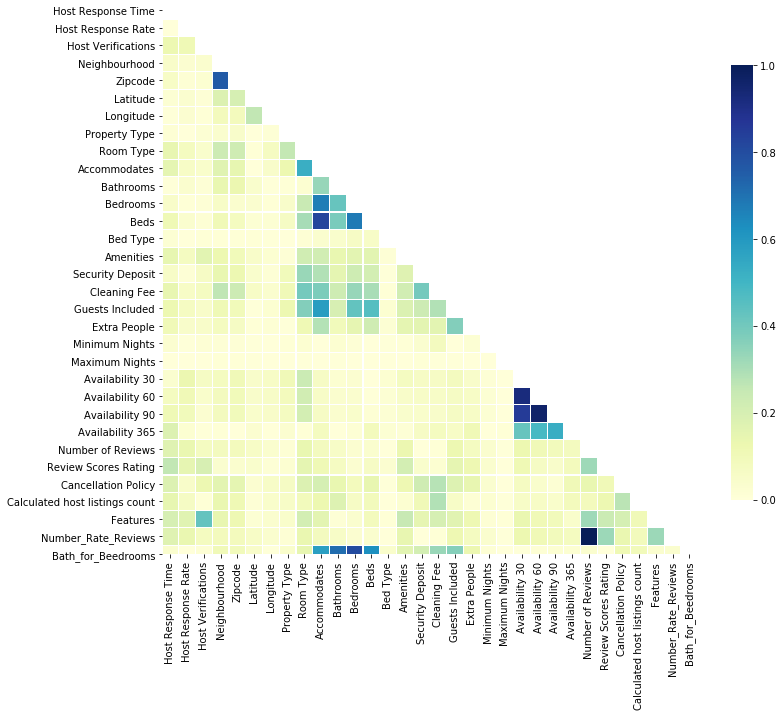

In [65]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [66]:
df.drop(['Availability 60', 'Availability 90', 'Availability 365'], axis=1, inplace=True)

<p style="color:ROYALBLUE">Vamos a buscar los outliers en Price.</p>

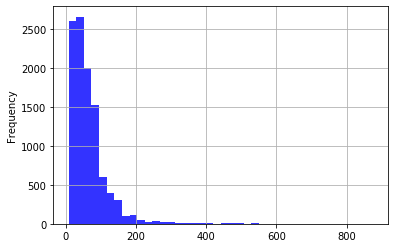

In [67]:
df["Price"].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
plt.show()

In [68]:
len(df[df["Price"] > 350])

62

<p style="color:ROYALBLUE">Vemos que tan sólo hay 62 filas con precios mayores de 350 € que es aproximadamente un 0,5 % del dataset, por tanto vamos a considerarlos outliers y vamos a eliminarlos.</p>

In [69]:
df.drop(df[df['Price']>350].index, inplace = True)
df.shape

(10479, 30)

<p style="color:ROYALBLUE">Vamos a poner los precios en escala logarítmica para obtener una distribución mas gausiana.</p>

In [70]:
df['Price'] = np.log10(df['Price'])

<p style="color:ROYALBLUE">Vamos mostrar un histograma de todas las variables para ver su distribución.</p>

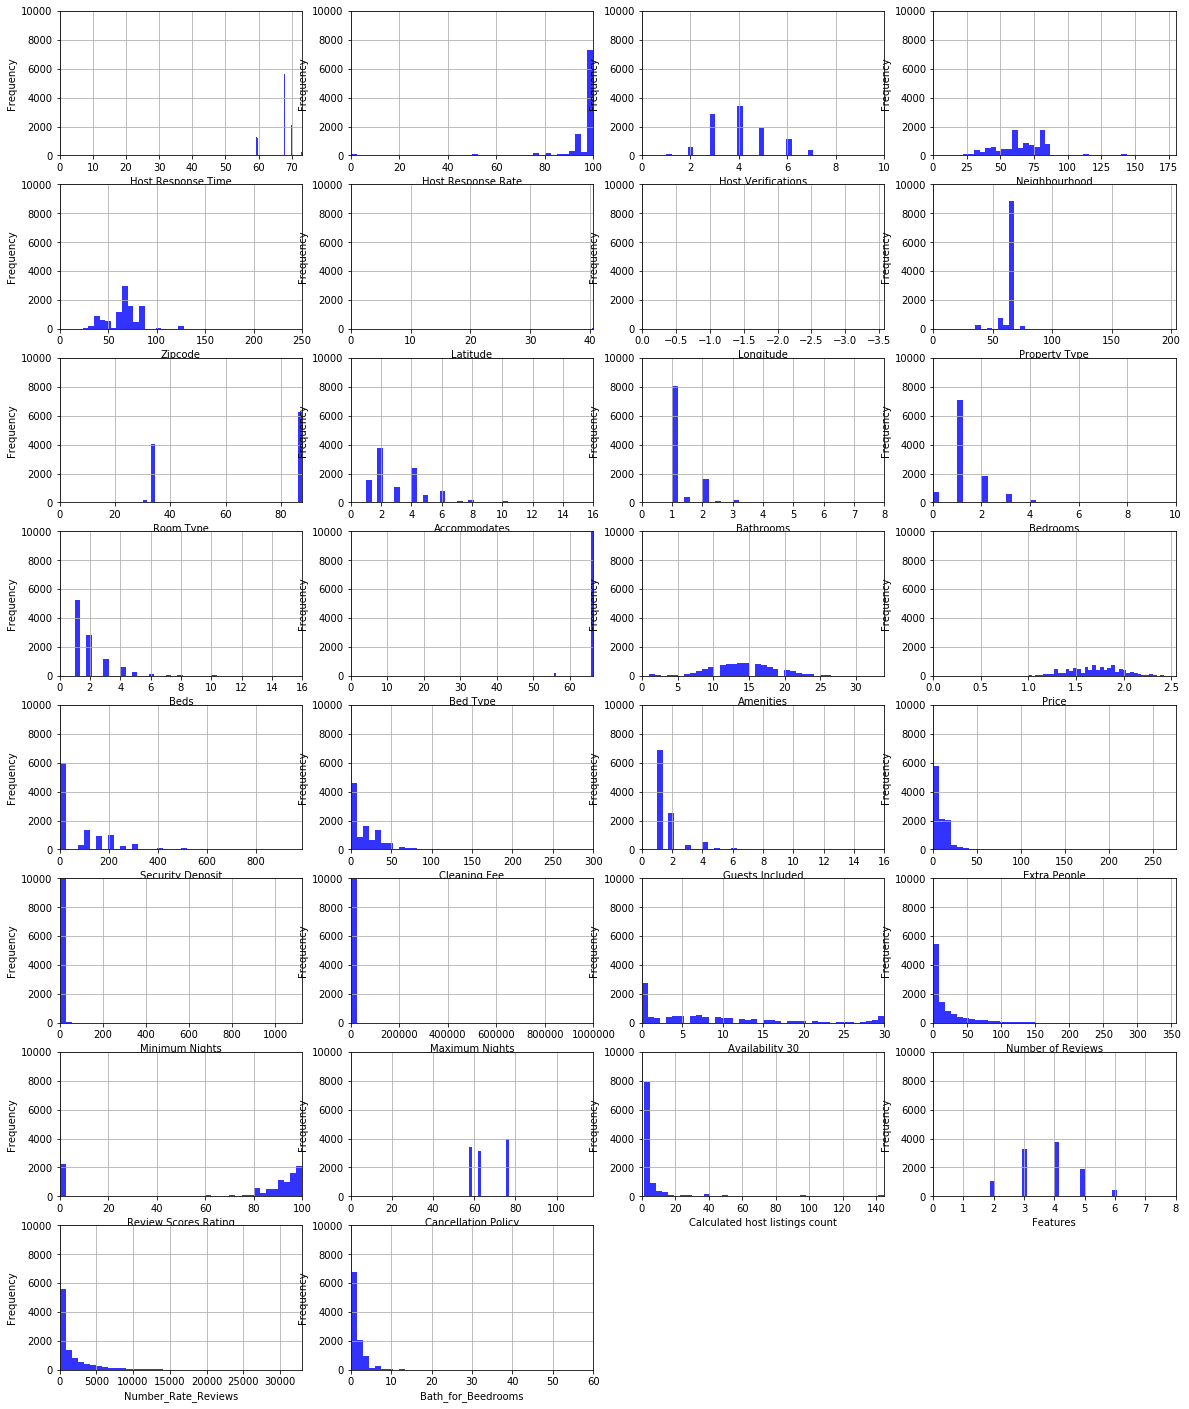

In [71]:
plt.figure(figsize=(20, 25))

for i, c in enumerate(df.columns):
    plt.subplot(8, 4, i + 1)
    df[c].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
    plt.axis([0, np.max(df[c]), 0, 10000])
    plt.xlabel(c)

plt.show()

<p style="color:ROYALBLUE">Podemos ver como las columnas Minimum Nights, Maximum Nights y Bed Type no aportan información al estar todas prácticamente en un mismo valor.</p>

In [72]:
df.drop(['Bed Type', 'Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)

In [73]:
len(df.columns)

27

<p style="color:ROYALBLUE">Aún nos quedan 27 columnas.</p>
<p style="color:ROYALBLUE">Tendremos que seguir analizando para reducir la dimensionalidad.</p>
<p style="color:ROYALBLUE">Organizamos las columnas de train para poder dividir entre características y variable objetivo.</p>

In [74]:
df.columns

Index(['Host Response Time', 'Host Response Rate', 'Host Verifications',
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'Features', 'Number_Rate_Reviews',
       'Bath_for_Beedrooms'],
      dtype='object')

In [75]:
# Movemos la columna Price a la primera posición
columns = ['Price','Host Response Time', 'Host Response Rate', 'Host Verifications',
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'Features', 'Number_Rate_Reviews',
       'Bath_for_Beedrooms']
df = df[columns]
df.head()

,Price,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Zipcode,Latitude,Longitude,Property Type,Room Type,...,Guests Included,Extra People,Availability 30,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Features,Number_Rate_Reviews,Bath_for_Beedrooms
0,1.778151,69.950897,100.0,4,104.492308,83.553785,40.407732,-3.684819,67.775218,87.674157,...,1,0,9,12,95.0,63.005709,2.0,3,1140.0,1.0
1,1.698970,67.626960,100.0,6,84.342342,67.590717,40.415802,-3.705340,67.775218,87.674157,...,1,0,15,20,91.0,57.398825,1.0,4,1820.0,1.0
2,1.000000,67.626960,100.0,7,39.898089,38.408602,40.389048,-3.740374,67.775218,30.129252,...,1,0,14,0,0.0,63.005709,16.0,5,0.0,1.5
3,1.477121,69.950897,100.0,4,59.132313,67.590717,40.412814,-3.703052,67.775218,34.258160,...,1,0,0,0,0.0,76.253018,97.0,2,0.0,3.0
4,1.505150,67.626960,100.0,4,53.504587,61.769392,40.438631,-3.713716,67.775218,34.258160,...,1,10,7,97,92.0,76.253018,2.0,4,8924.0,1.0


In [76]:
data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

<p style="color:ROYALBLUE">Vamos a usar Lasso para intentar ver que variables son menos significativas.</p>

<p style="color:ROYALBLUE">¡¡¡No he conseguido que me funcione esta celda!!! Queria comprobar que variables eliminaba Lasso.</p>

In [77]:
# Por convención, GridSearchCV siempre intenta MAXIMIZAR los resultados, por lo que
# funciones de coste, como MSE, tienen que ir negadas: https://github.com/scikit-learn/scikit-learn/issues/2439
# Por eso aparece neg_mean_squared_error y por eso hay luego un -1 multiplicando

alpha_vector = np.logspace(-10,10,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

/Users/alejandrolopezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.58849052767717, tolerance: 0.06579003180987882
  positive)
/Users/alejandrolopezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.7245540755552, tolerance: 0.06689752820526473
  positive)
/Users/alejandrolopezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.66353851487762, tolerance: 0.0663279750081066
  positive)
/Users/alejandrolopezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475

KeyboardInterrupt: 

<p style="color:ROYALBLUE">Vamos a probar con F-Regression y Mutual Info</p>

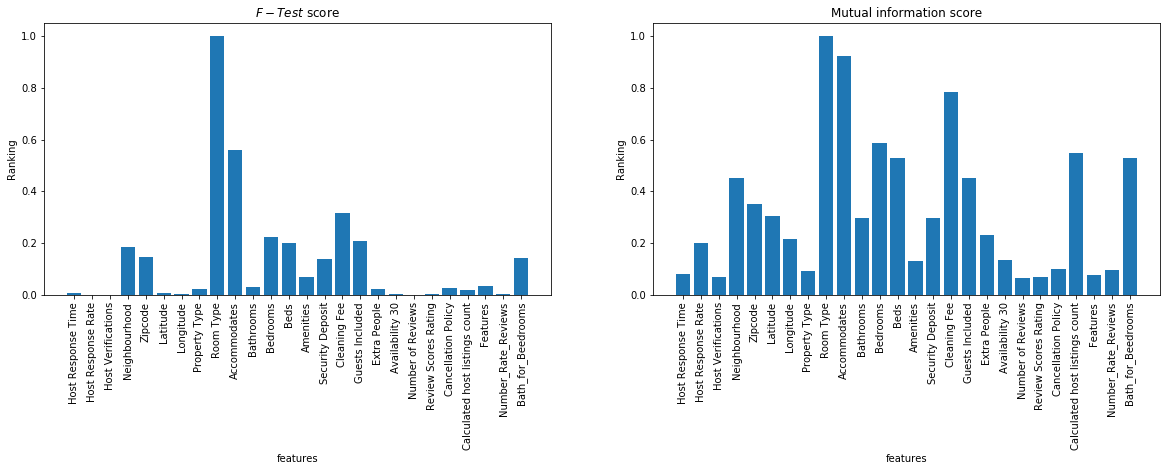

In [78]:
# do calculations
f_test, _ = f_regression(XtrainScaled, y_train.ravel())
f_test /= np.max(f_test)

mi = mutual_info_regression(XtrainScaled, y_train.ravel())
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(XtrainScaled.shape[1]),f_test,  align="center")
plt.xticks(range(XtrainScaled.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(XtrainScaled.shape[1]),mi, align="center")
plt.xticks(range(XtrainScaled.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

<p style="color:ROYALBLUE">Vamos a probar DecisionTree.</p>

best parameters: {'max_depth': 8}


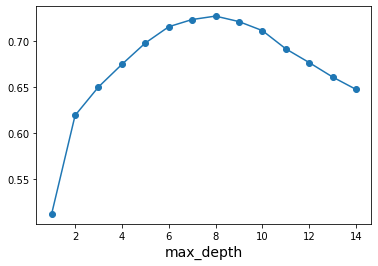

In [79]:
max_depth = range(1,15)
parameters = {'max_depth': max_depth}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=5)
grid.fit(XtrainScaled, y_train)

print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth, scores, '-o')
plt.xlabel('max_depth', fontsize=14)
plt.show()

In [80]:
max_depth_opt = grid.best_params_['max_depth']

reg_tree = DecisionTreeRegressor(max_depth=max_depth_opt).fit(XtrainScaled, y_train)

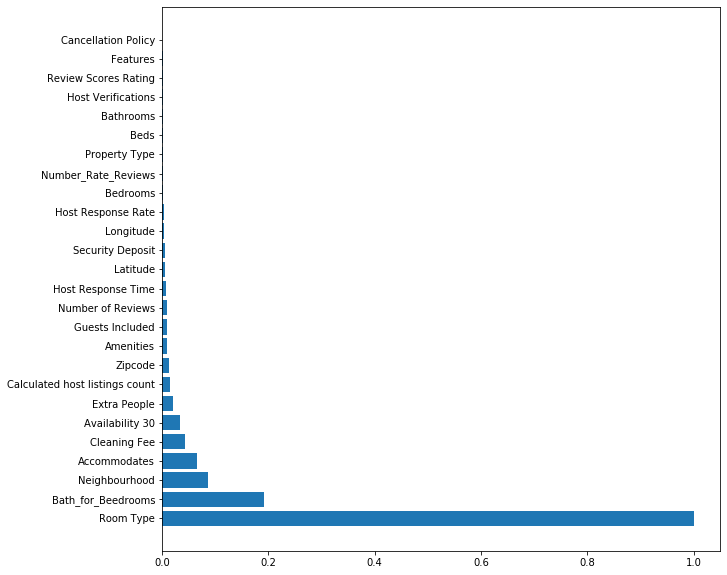

In [81]:
importances = reg_tree.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

<p style="color:ROYALBLUE">Vamos a probar Random Forest.</p>

<p style="color:ROYALBLUE">¡¡OJO!! Esta celda tarda mucho en ejecutarse, por si quieres evitarlo</p>

best mean cross-validation score: 0.799
best parameters: {'max_depth': 23}


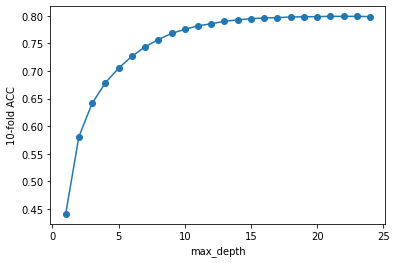

In [82]:
maxDepth = range(1,25)
parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=parameters, cv=5) 
grid.fit(XtrainScaled, y_train.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [83]:
# La mejor profundidad que nos da es 23, pero creo que desde 12 la mejora es mínima y así hacemos el modelo mas sencillo
bagModel = RandomForestRegressor(max_depth=12,n_estimators=200,max_features='sqrt').fit(X_train,y_train.ravel())

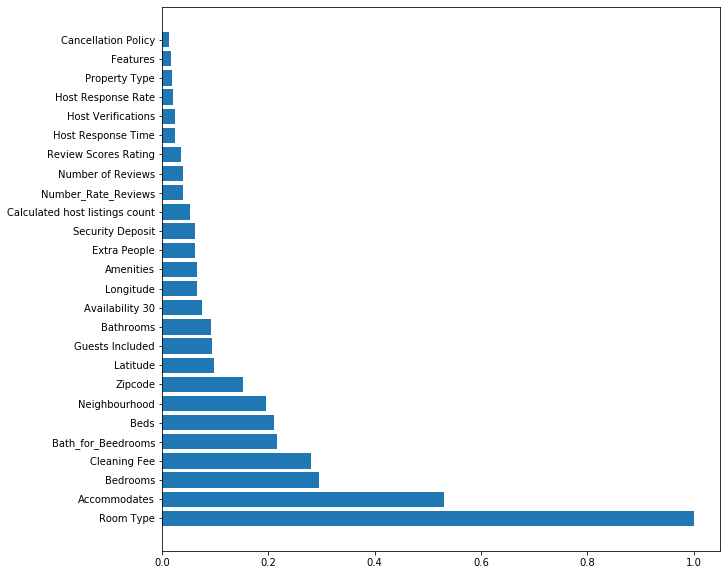

In [84]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

<p style="color:ROYALBLUE">Según los análisis realizados anteriormente podemos ver como hay variables que no tienen apenas peso para el modelo, por tanto vamos a prescindir de las siguientes variables:</p>

In [85]:
df.drop([
    'Cancellation Policy','Number_Rate_Reviews','Host Verifications', 'Review Scores Rating',
    'Property Type', 'Beds', 'Features', 'Bedrooms', 'Bathrooms', 'Host Response Rate', 'Security Deposit',
    'Host Response Time', 'Latitude', 'Longitude', 'Number of Reviews'
    ], 
    axis=1, inplace=True)

In [86]:
data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

<p style="color:ROYALBLUE">Ya estamos listos para empezar con nuestros modelos de predicción.</p>
<p style="color:ROYALBLUE">Cargaremos el dataset de test y realizaremos las mismas transformaciones que en train.</p>

In [87]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

## Transformaciones para test

In [88]:
# Modificaciones a realizar al dataset de test

# Borramos las columnas que hemos razonado anteriormente.
df_test.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 
    ], 
    axis=1, inplace=True)

# Escala logaritmica de price
df_test['Price'] = np.log10(df_test['Price'])

# En la columna host verification nos quedamos con el número de verificaciones del anfitrión
df_test['Host Verifications'] = df_test['Host Verifications'].apply(lambda x: len(str(x).split(",")))

# Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed
df_test['Neighbourhood'] = df_test['Neighbourhood'].fillna(df_test['Neighbourhood Cleansed'])

# Eliminamos la columna Neighbourhood Cleansed que ya no nos hace falta
df_test.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

# En la columna Amenities nos quedamos con el número de comodidades del inmueble
df_test['Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(",")))

# En la columna Features nos quedamos con el número de caractarísticas del inmueble
df_test['Features'] = df_test['Features'].apply(lambda x: len(str(x).split(",")))

# Nos quedamos con los inmuebles de Madrid
df_test = df_test[df_test['City'] == "Madrid"]

# Eliminamos la columna City que ya no nos hace falta
df_test.drop(['City'], axis=1, inplace=True)

# Borramos las columnas de pies cuadrados, precio semanal y mensual
df_test.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis=1, inplace=True)

# Rellenamos tasa de limpieza y fianza
df_test['Security Deposit'] = df_test['Security Deposit'].fillna(value=0)
df_test['Cleaning Fee'] = df_test['Cleaning Fee'].fillna(value=0)

# Rellenamos el número de baños
df_test['Bathrooms'] = df_test['Bathrooms'].fillna(value=1)

# Borramos los dormitorios nulos
df_test.drop(df_test[df_test['Bedrooms'].isnull()].index, inplace = True)

# Rellenamos las camas nulas
df_test['Beds'] = df_test['Beds'].fillna(df_test['Bedrooms'])

# Borramos los precios nulos
df_test.drop(df_test[df_test['Price'].isnull()].index, inplace = True)

# Rellenamos la tasa de respuesta con la media obtenida en train
df_test["Host Response Rate"].fillna(mean_host_resp, inplace=True)

# Rellenamos las revisiones nulas
df_test['Review Scores Rating'] = df_test['Review Scores Rating'].fillna(value=0)

# Los datos faltantes en ZipCode los rellenamos con unknown
df_test['Zipcode'] = df_test['Zipcode'].fillna('unknown')

# Los datos faltantes en Host Response Time los rellenamos con unknown
df_test['Host Response Time'] = df_test['Host Response Time'].fillna('unknown')

# Borramos las columnas de disponibilidad
df_test.drop(['Availability 60', 'Availability 90', 'Availability 365'], axis=1, inplace=True)

# Creamos nuevas columnas
df_test['Number_Rate_Reviews'] = df_test['Number of Reviews'] * df_test['Review Scores Rating']
df_test['Bath_for_Beedrooms'] = df_test['Bedrooms'] * df_test['Bathrooms']

# Borramos outliers
df_test.drop(df[df['Price']>350].index, inplace = True)

# Borramos columnas
df_test.drop(['Bed Type', 'Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)

# Ponemos price la primera
columns = ['Price','Host Response Time', 'Host Response Rate', 'Host Verifications',
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'Features', 'Number_Rate_Reviews',
       'Bath_for_Beedrooms']
df_test = df_test[columns]

df_test.drop([
    'Cancellation Policy','Number_Rate_Reviews','Host Verifications', 'Review Scores Rating',
    'Property Type', 'Beds', 'Features', 'Bedrooms', 'Bathrooms', 'Host Response Rate', 'Security Deposit',
    'Host Response Time', 'Latitude', 'Longitude', 'Number of Reviews'
    ], 
    axis=1, inplace=True)

In [89]:
# Luego, en test, categorizamos con los datos de train!
# ESTO ES EN TEST.CSV!
categorical_feature_mask = df_test.dtypes==object
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
for c in categorical_cols:
    df_test[c] = df_test[c].map(mean_map[c])

In [90]:
df_test.isnull().any()

Price                             False
Neighbourhood                      True
Zipcode                            True
Room Type                         False
Accommodates                      False
Amenities                         False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Availability 30                   False
Calculated host listings count    False
Bath_for_Beedrooms                False
dtype: bool

In [91]:
df_test['Neighbourhood'].isnull().sum()

1

In [92]:
df_test['Zipcode'].isnull().sum()

8

<p style="color:ROYALBLUE">En el dataset de test tenemos 9 registros con NA debido al codificado de variables, como es una cantidad insignificante vamos a eliminar esos registros.</p>

In [93]:
df_test.drop(df_test[df_test['Neighbourhood'].isnull()].index, inplace = True)
df_test.drop(df_test[df_test['Zipcode'].isnull()].index, inplace = True)

In [94]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2625.0,1.709910,0.291182,0.954243,1.477121,1.707570,1.903090,2.929419
Neighbourhood,2625.0,65.380354,18.671224,20.428571,53.661972,66.000000,79.171924,140.911111
Zipcode,2625.0,65.797533,16.710322,29.181818,59.766871,67.590717,74.283099,123.820652
Room Type,2625.0,66.035060,26.303414,30.129252,34.258160,87.674157,87.674157,87.674157
Accommodates,2625.0,3.205714,2.000849,1.000000,2.000000,3.000000,4.000000,16.000000
Amenities,2625.0,14.339810,4.698975,1.000000,11.000000,14.000000,17.000000,30.000000
Cleaning Fee,2625.0,16.315048,20.817573,0.000000,0.000000,10.000000,29.000000,250.000000
Guests Included,2625.0,1.599238,1.128956,1.000000,1.000000,1.000000,2.000000,15.000000
Extra People,2625.0,7.285333,10.301908,0.000000,0.000000,0.000000,14.000000,271.000000
Availability 30,2625.0,8.725714,8.959396,0.000000,1.000000,6.000000,13.000000,30.000000


In [95]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

<p style="color:ROYALBLUE">Probamos un modelo de regresión lineal.</p>

In [96]:
lr = LinearRegression().fit(XtrainScaled, y_train)
print("Accuracy en train:", lr.score(XtrainScaled, y_train))
print("Accuracy en test:", lr.score(XtestScaled, y_test))

Accuracy en train: 0.6866595862881711
Accuracy en test: 0.6762394462404511


<p style="color:ROYALBLUE">Probamos el modelo de Ridge.</p>

best mean cross-validation score: -0.025
best parameters: {'alpha': 31.622776601683793}


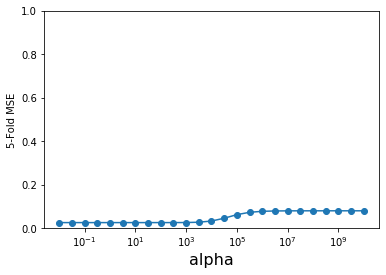

In [97]:
alpha_vector = np.logspace(-2,10,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

In [98]:
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha=alpha_optimo).fit(XtrainScaled,y_train)

In [99]:
print("Accuracy en train:", ridge.score(XtrainScaled, y_train))
print("Accuracy en test:", ridge.score(XtestScaled, y_test))

Accuracy en train: 0.6866561425639791
Accuracy en test: 0.6761884008871323


<p style="color:ROYALBLUE">Probamos el modelo de Lasso.</p>

best mean cross-validation score: -0.025
best parameters: {'alpha': 0.00017782794100389227}


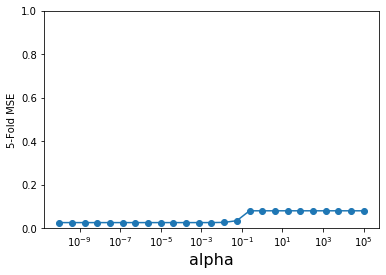

In [100]:
alpha_vector = np.logspace(-10,5,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

In [101]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha=alpha_optimo).fit(XtrainScaled,y_train)

In [102]:
print("Accuracy en train:", ridge.score(XtrainScaled, y_train))
print("Accuracy en test:", ridge.score(XtestScaled, y_test))

Accuracy en train: 0.6866561425639791
Accuracy en test: 0.6761884008871323


<p style="color:ROYALBLUE">Probamos el árbol de decisión en regresión.</p>

best parameters: {'max_depth': 7}


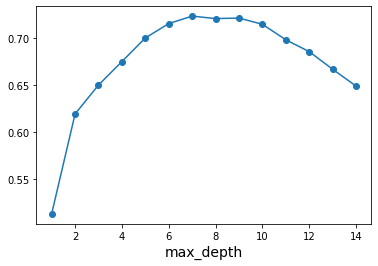

In [103]:
max_depth = range(1,15)
parameters = {'max_depth': max_depth}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=5)
grid.fit(XtrainScaled, y_train)

print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth, scores, '-o')
plt.xlabel('max_depth', fontsize=14)
plt.show()

In [104]:
max_depth_opt = grid.best_params_['max_depth']

reg_tree = DecisionTreeRegressor(max_depth=max_depth_opt).fit(XtrainScaled, y_train)

In [105]:
print("Accuracy en train:", reg_tree.score(XtrainScaled, y_train))
print("Accuracy en test:", reg_tree.score(XtestScaled, y_test))

Accuracy en train: 0.7623939220005888
Accuracy en test: 0.7140878725483707


<p style="color:ROYALBLUE">Probamos el random forest en regresión.</p>
<p style="color:ROYALBLUE">¡¡OJO!! Esta celda también tarda bastante.</p>

best mean cross-validation score: 0.791
best parameters: {'max_depth': 20}


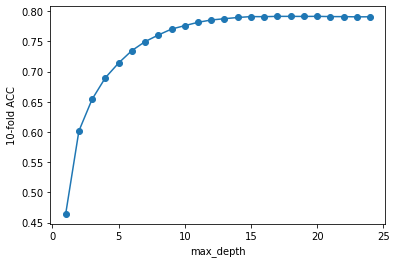

In [107]:
maxDepth = range(1,25)
parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=parameters, cv=5) 
grid.fit(XtrainScaled, y_train.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [108]:
# La mejor profundidad que nos da es 20, pero creo que desde 12 la mejora es mínima y así hacemos el modelo mas sencillo
bagModel = RandomForestRegressor(max_depth=12,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())

In [109]:
print("Accuracy en train:", bagModel.score(XtrainScaled, y_train))
print("Accuracy en test:", bagModel.score(XtestScaled, y_test))

Accuracy en train: 0.8689816916701862
Accuracy en test: 0.7658587477530464


<p style="color:ROYALBLUE">Viendo la diferencia tan grande que hay entre train y test es mas que probable que se esté produciendo un overfitting, por tanto vamos a bajar la profundidad del árbol.</p>

In [110]:
bagModel = RandomForestRegressor(max_depth=8,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())
print("Accuracy en train:", bagModel.score(XtrainScaled, y_train))
print("Accuracy en test:", bagModel.score(XtestScaled, y_test))

Accuracy en train: 0.7929309294511208
Accuracy en test: 0.7397399523335637


<p style="color:ROYALBLUE">Podemos observar como los resultados de regresión lineal, Ridge y Lasso son prácticamente iguales. Con el árbol de decisión ya tenemos una mejora y con el random forest una mejora aún mayor, por tanto y tras todo el análisis podemos concluir que el mejor modelo para predecir el precio sería el RandomForestRegressor que tiene una Accuracy en test de 0,74.</p>